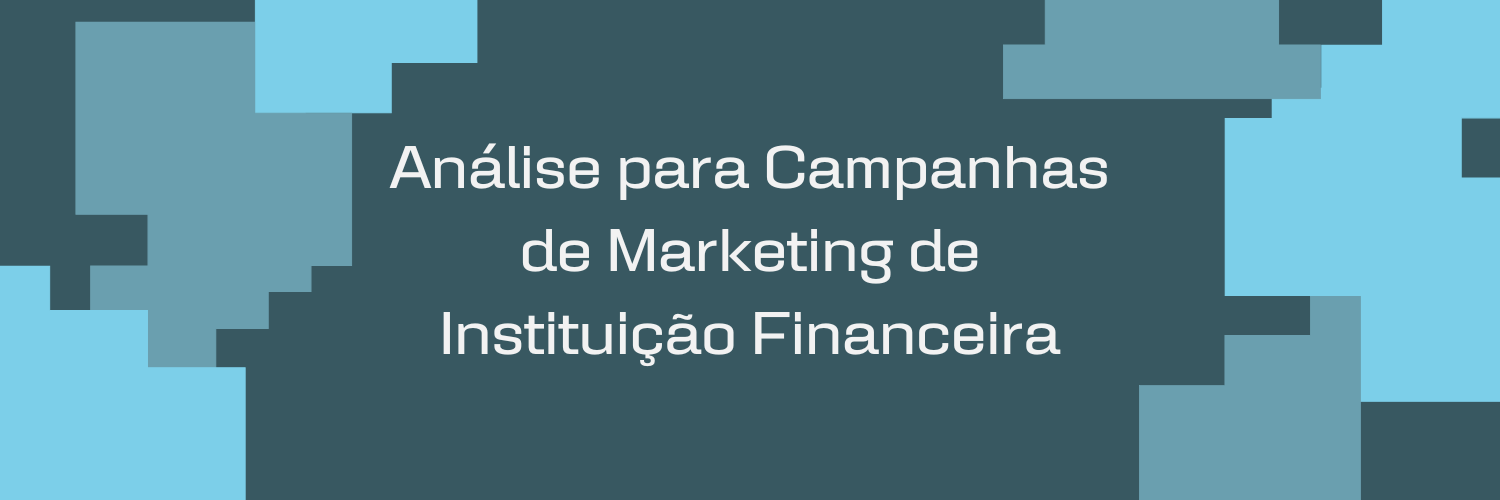

Como parte do meu aprimoramento na área de Análise de Dados, estou embarcando em uma jornada de aprendizado que envolve o desenvolvimento de estudos de caso. Esta iniciativa tem como objetivo não apenas adquirir conhecimentos teóricos, mas também aplicá-los de forma prática.

Para proporcionar um contexto a essa exploração, apresento um cenário fictício que servirá como pano de fundo para o estudo.

Esse estudo de caso explora abordagens para tratamento de valores ausentes como a imputação e a exclusão Listwise.

## Cenário

Banco Alcobaça é uma instituição bancária fictícia que atua em Portugal. Embora seja uma empresa de pequeno porte, tem grandes ambições de se destacar no cenário bancário português e tem investido em diversos produtos. Para conquistar mais clientes decidiram lançar um produto: o Depósito Bancário.

O Depósito Bancário é uma forma de investimento de baixo risco em que você deposita uma quantia de dinheiro em uma instituição financeira por um período de tempo específico, conhecido como "prazo". Durante esse período, o dinheiro não pode ser retirado sem penalidades.

Após incluir o Depósito Bancário na lista de produtos, decidiram questionar nas campanhas de marketing direto, através de ligações telefônicas, se o produto foi ou não adquirido pelo cliente.

Sua equipe foi selecionada para analisar o perfil do cliente que estaria mais propenso a adquirir esse novo produto. Seu trabalho é fornecer insights que ajudarão a aprimorar as estratégias de campanhas de marketing e, assim, aumentar a taxa de conversão.



## Dados

* ### **Conjunto de Dados**

O conjunto de dados está disponível no [UCI Machine Learning Repository](https://archive.ics.uci.edu/about) e foi criado por S. Moro, P. Rita e P. Cortez.

O *UCI Machine Learning Repository* é um repositório que fornece acesso a uma vasta coleção de conjuntos de dados projetados especificamente para pesquisas em aprendizado de máquina e mineração de dados. Ele é mantido pela Universidade da Califórnia, Irvine (UCI) e é uma das fontes mais conhecidas e respeitadas de conjuntos de dados de aprendizado de máquina no mundo acadêmico e na comunidade científica.

Você pode acessar o conjunto de dados [aqui](https://archive.ics.uci.edu/dataset/222/bank+marketing).


* ### **Acessibilidade e privacidade dos dados**

Na seção [License](https://archive.ics.uci.edu/dataset/222/bank+marketing) é informado que o conjunto de dados utiliza a licença *Atribuição 4.0 Internacional (CC BY 4.0)*.

A [Licença Pública Creative Commons Atribuição 4.0 Internacional](https://creativecommons.org/licenses/by/4.0/legalcode.pt) permite que você use, compartilhe e adapte obras criativas, desde que dê crédito ao autor original e não crie restrições adicionais para os outros no uso dessa obra. É uma maneira flexível de compartilhar e reutilizar conteúdo criativo enquanto respeita os direitos do autor.

* ### **Informações sobre o conjunto de dados**

Os dados se referem a campanhas de marketing direto realizadas por uma instituição bancária em Portugal. Essas campanhas foram conduzidas por meio de ligações telefônicas. Frequentemente, foi necessário fazer mais de um contato com o mesmo cliente para determinar se o produto (depósito a prazo bancário) foi ou não contratado.

Foram realizadas modificações no conjunto provocando problemas nos dados para focar na limpeza e análise.

O arquivo utilizado neste projeto possui 45.211 registros de ligações para clientes bancários, contendo 19 variáveis.

### **Dicionário dos Dados**

* customerid: identificador do cliente
* age: idade do cliente
* salary: salário do cliente
* balance: saldo médio anual em euro
* marital: estado civil*  
* jobedu: tipo de emprego e escolaridade
* targeted: cliente alvo
* default: se o cliente está com crédito em atraso
* housing: se o cliente tem empréstimo habitacional
* loan: se o cliente tem empréstimo pessoal
* contact: tipo de comunicação de contato
* day: último dia de contato do mês
* month: último mês de contato do ano
* duration: última duração de contato, em segundos
* campaign: número de contatos realizados durante esta campanha e para este cliente
* pdays: número de dias que se passaram desde o último contato do cliente em uma campanha anterior**
* previous: número de contatos realizados antes desta campanha e para este cliente
* poutcome: resultado da campanha de marketing anterior
* response: se o cliente assinou um depósito a prazo

**Observações:** * divorced engloba divorciado e viúvo. ** `-1` significa que o cliente não foi contatado anteriormente.



## Preparação dos Dados

### Instalando e Carregando os Pacotes

In [ ]:
from platform import python_version
print('Versão da Linguagem Python:', python_version())

Versão da Linguagem Python: 3.10.12


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Carregando os Dados

In [ ]:
# Carregando o dataset
df = pd.read_csv("/content/dataset.csv")

In [ ]:
print("Temos", df.shape[0], "linhas e", df.shape[1], "colunas.")

Temos 45211 linhas e 19 colunas.


In [ ]:
# Amostra do conjunto de dados
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Análise Exploratória

In [ ]:
# Resumo de informações do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [ ]:
# Verificando valores duplicados
duplicados = df['customerid'].duplicated().sum()
print(f"O dataframe tem {duplicados} valores duplicados.")

O dataframe tem 0 valores duplicados.


In [ ]:
# Não usaremos a coluna customerid, pois é um identificador. Vamos removê-la.
df.drop(["customerid"], axis = 1, inplace = True)

In [ ]:
# Verificando os nomes das colunas
df.columns.tolist()

['age',
 'salary',
 'balance',
 'marital',
 'jobedu',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [ ]:
# Verificando os valores únicos da coluna jobedu
df['jobedu'].unique()

array(['management,tertiary', 'technician,secondary',
       'entrepreneur,secondary', 'blue-collar,unknown', 'unknown,unknown',
       'entrepreneur,tertiary', 'retired,primary', 'admin.,secondary',
       'technician,unknown', 'services,secondary', 'admin.,unknown',
       'blue-collar,primary', 'blue-collar,secondary',
       'management,secondary', 'retired,secondary', 'retired,unknown',
       'admin.,primary', 'self-employed,tertiary', 'services,primary',
       'admin.,tertiary', 'retired,tertiary', 'technician,tertiary',
       'self-employed,primary', 'technician,primary',
       'management,unknown', 'unemployed,tertiary', 'services,unknown',
       'housemaid,primary', 'self-employed,secondary',
       'unemployed,secondary', 'student,secondary',
       'entrepreneur,unknown', 'services,tertiary', 'student,unknown',
       'unemployed,unknown', 'entrepreneur,primary', 'student,tertiary',
       'self-employed,unknown', 'unemployed,primary',
       'management,primary', 'blue

A coluna "jobedu" parece ter duas informações: tipo de trabalho e escolaridade. Vamos separar em duas colunas. O que tiver antes da vírgula será a coluna 'job' e depois da vírgula 'education'.

In [ ]:
# Fazemos o split da coluna jobedu e criamos a coluna job com o primeiro elemento antes da vírgula
df['job'] = df["jobedu"].apply(lambda x:x.split(",")[0])

In [ ]:
df.head(2)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician


In [ ]:
# Fazemos o split da coluna jobedu e criamos a coluna education com o segundo elemento depois da vírgula
df['education'] = df["jobedu"].apply(lambda x:x.split(",")[1])

In [ ]:
df.head(2)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary


In [ ]:
# Agora podemos eliminar a coluna "jobedu"
df.drop(["jobedu"], axis = 1, inplace = True)

In [ ]:
df.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary


### Verificando os valores ausentes

In [ ]:
# Verificando se temos valores nulos
df.isna().any()

age           True
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

Temos quatro variáveis com valores nulos: age, salary, month e response.

In [ ]:
# Quantificando os valores nulos
df.isna().sum()

age          20
salary       26
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

### Tratamento dos valores ausentes da variável ***age***

In [ ]:
# Valores ausentes da variável
print(f"Total de Valores Nulos em 'age': {df.age.isnull().sum()}")

Total de Valores Nulos em 'age': 20


In [ ]:
# Percentual de valores ausentes
nulos = round(df['age'].isnull().mean() * 100, 2)
print(f"Percentual de Valores Nulos em 'age': {nulos}%")

Percentual de Valores Nulos em 'age': 0.04%


Dado que a porcentagem de valores ausentes é baixa (0.04%), não é aconselhável excluir a coluna. Uma alternativa seria remover os registros com valores ausentes (o que resultaria na perda de 20 linhas no conjunto de dados) ou aplicar uma técnica de imputação. Optamos pela segunda opção.

Vamos selecionar uma medida de tendência central, aplicá-la e preencher os valores faltantes.

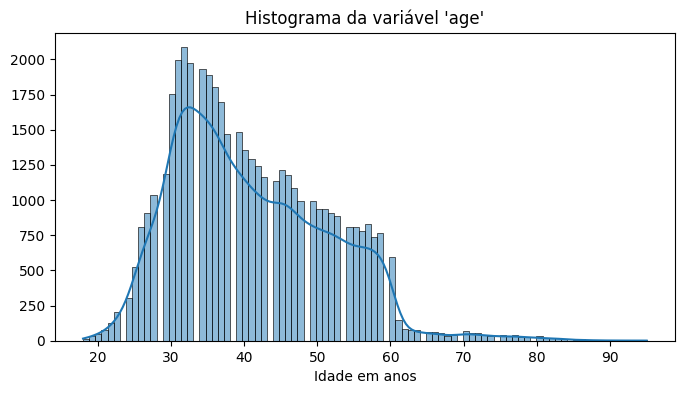

In [ ]:
# Histograma
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='age', kde=True)
plt.title("Histograma da variável 'age'")
plt.xlabel("Idade em anos")
plt.ylabel("")
plt.show()

Observamos uma concentração significativa de registros na faixa etária entre 30 e 40 anos. No entanto, vale destacar que essa variável não segue uma distribuição normal e apresenta assimetria. Devido a essa característica, optamos por não utilizar a média para preencher os valores ausentes na idade.

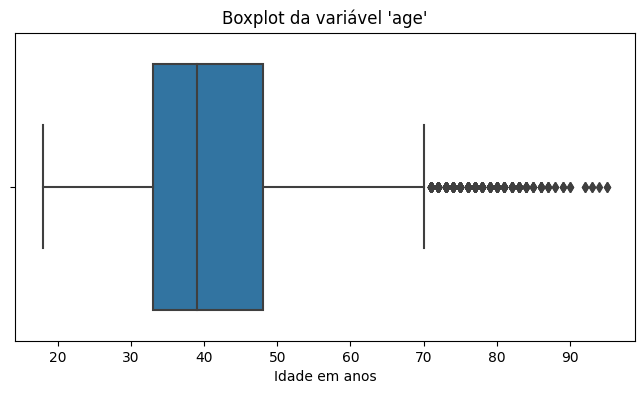

In [ ]:
# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='age')
plt.title("Boxplot da variável 'age'")
plt.xlabel("Idade em anos")
plt.show()

A mediana da idade está centrada em torno dos 40 anos e identificamos presença de outliers com idades acima de 70 anos. Além disso, a maior parte dos clientes está na faixa etária entre 30 e 50 anos. Devido ao impacto dos outliers no cálculo da média, reforçamos nossa decisão de não utilizar essa medida para preencher os valores ausentes na idade.

In [ ]:
# Calculando as medidas de tendência central para a coluna "age"

# Média
media = round(df['age'].mean(), 2)

# Mediana
mediana = round(df['age'].median(), 2)

print("Média de Idade:", media)
print("Mediana de Idade:", mediana)
print("Moda de Idade:", df['age'].mode().values[0])  # Selecionamos o primeiro valor da moda

Média de Idade: 40.94
Mediana de Idade: 39.0
Moda de Idade: 32.0


A **média** não é a escolha mais adequada devido à assimetria na distribuição dos nossos dados e à presença de outliers.

A **mediana**, embora não altere significativamente o padrão geral dos dados, destaca uma informação específica.

A **moda** representa o valor mais frequente, então essa escolha faz sentido, especialmente quando já temos várias idades registradas como 32, reforçando esse padrão predominante.

Portanto, decidimos preencher os valores ausentes com a **moda**, dado o reduzido número de valores ausentes, garantindo assim mínimas alterações no padrão geral dos dados.




In [ ]:
# Preenchendo os valores ausentes com 32 (moda)
df.age.fillna("32", inplace = True)

In [ ]:
# Verificando o tipo da coluna "age"
tipo_coluna = df['age'].dtype

print("Tipo da coluna 'age':", tipo_coluna)

Tipo da coluna 'age': object


O tipo da coluna age deveria ser inteiro, portanto iremos convertê-la.

In [ ]:
df.age = df.age.astype("int")

In [ ]:
print("Tipo da coluna 'age':", df.age.dtypes)

Tipo da coluna 'age': int64


In [ ]:
# Média
media = round(df['age'].mean(), 2)

# Mediana
mediana = round(df['age'].median(), 2)

print("Média de Idade:", media)
print("Mediana de Idade:", mediana)

Média de Idade: 40.93
Mediana de Idade: 39.0


Mesmo com a imputação dos valores ausentes com a moda, não tivemos alterações nos valores da média e mediana.

In [ ]:
# Percentual de valores ausentes
nulos = round(df['age'].isnull().mean() * 100, 2)
print(f"Percentual de Valores Nulos em 'age': {nulos}%")

Percentual de Valores Nulos em 'age': 0.0%


### Tratamento dos valores ausentes da variável ***month***

In [ ]:
# Valores ausentes da variável
print(f"Total de Valores Nulos em 'month': {df.month.isnull().sum()}")

Total de Valores Nulos em 'month': 50


In [ ]:
# Percentual de valores ausentes
nulos = round(df['month'].isnull().mean() * 100, 2)
print(f"Percentual de Valores Nulos em 'month': {nulos}%")

Percentual de Valores Nulos em 'month': 0.11%


Dado que o percentual de valores ausentes é inferior a 30% (0.11%), não é aconselhável eliminar a coluna. Uma alternativa viável é remover os registros com valores ausentes (o que resultaria na perda de 50 linhas no conjunto de dados) ou aplicar uma técnica de imputação. Optamos pela segunda opção.

In [ ]:
print("Tipo da coluna 'month':", df.month.dtypes)

Tipo da coluna 'month': object


In [ ]:
contagem_valores = df['month'].value_counts().reset_index()
contagem_valores.columns = ['categoria', 'quantidade']
print(contagem_valores)

    categoria  quantidade
0   may, 2017       13747
1   jul, 2017        6888
2   aug, 2017        6240
3   jun, 2017        5335
4   nov, 2017        3968
5   apr, 2017        2931
6   feb, 2017        2646
7   jan, 2017        1402
8   oct, 2017         738
9   sep, 2017         576
10  mar, 2017         476
11  dec, 2017         214


Vamos imputar os valores ausentes da variável month.

Podemos preenhcer os campos ausentes com o valor 'data desconhecida', mas como são poucos registros iremos adotar a imputação com a moda.

In [ ]:
# Categoria mais frequente na coluna 'month'
categoria_mais_frequente = df['month'].mode()[0]

print(f"A categoria que aparece com mais frequência na coluna 'month' é {categoria_mais_frequente}")

A categoria que aparece com mais frequência na coluna 'month' é may, 2017


In [ ]:
# Imputação com a moda
df.month.fillna("may, 2017", inplace = True)

In [ ]:
# Percentual de valores ausentes
nulos = round(df['month'].isnull().mean() * 100, 2)
print(f"Percentual de Valores Nulos em 'month': {nulos}%")

Percentual de Valores Nulos em 'month': 0.0%


### Tratamento dos valores ausentes da variável ***salary***

In [ ]:
# Valores ausentes da variável
print(f"Total de Valores Nulos em 'salary': {df.salary.isnull().sum()}")

Total de Valores Nulos em 'salary': 26


In [ ]:
# Percentual de valores ausentes
nulos = round(df['salary'].isnull().mean() * 100, 2)
print(f"Percentual de Valores Nulos em 'salary': {nulos}%")

Percentual de Valores Nulos em 'salary': 0.06%


Dado que o percentual de valores ausentes é inferior a 30% (0.06%), não é aconselhável eliminar a coluna. Uma alternativa viável é remover os registros com valores ausentes (o que resultaria na perda de 26 linhas no conjunto de dados) ou aplicar uma técnica de imputação. Optamos pela segunda opção.

In [ ]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


Na linha 4 identificamos um salário igual a zero. Pode ser um outlier.

Vamos dar uma olhada no histograma e boxplot.

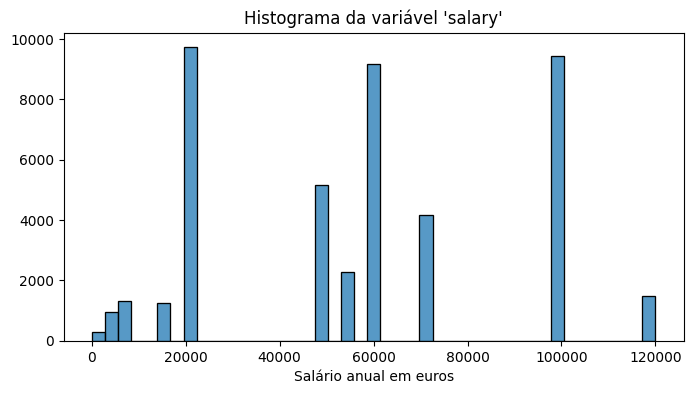

In [ ]:
# Histograma
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='salary')
plt.title("Histograma da variável 'salary'")
plt.xlabel("Salário anual em euros")
plt.ylabel("")
plt.show()

A variável não exibe um padrão específico.

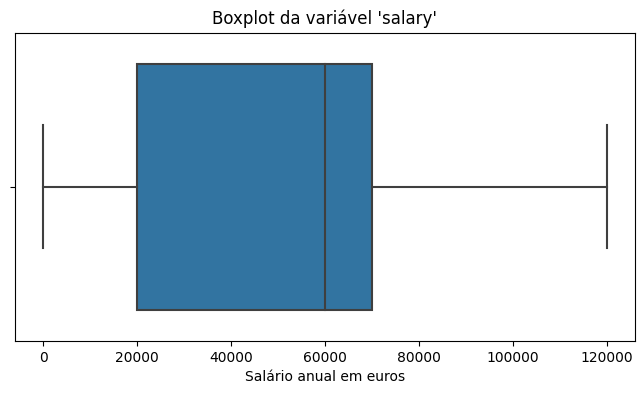

In [ ]:
# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='salary')
plt.title("Boxplot da variável 'salary'")
plt.xlabel("Salário anual em euros")
plt.show()

Não temos valores outliers, mas a maioria dos salários está abaixo da mediana.

Vamos calcular as medidas de tendência central.

In [ ]:
media = round(df['salary'].mean(), 2)
mediana = round(df['salary'].median(), 2)

print("Média do Salário:", media)
print("Mediana do Salário:", mediana)
print("Moda do Salário:", df['salary'].mode().values[0])

Média do Salário: 57008.65
Mediana do Salário: 60000.0
Moda do Salário: 20000.0


Preencheremos os valores ausentes com a mediana, uma vez que os dados parecem apresentar assimetria. A média não é apropriada neste caso, e a moda também não será utilizada, pois o valor mais frequente está consideravelmente abaixo da média e da mediana.

In [ ]:
df.salary.fillna(60000, inplace = True)

In [ ]:
contagem_valores = df['salary'].value_counts().reset_index()
contagem_valores.columns = ['categoria', 'quantidade']
print(contagem_valores)

    categoria  quantidade
0     20000.0        9725
1    100000.0        9454
2     60000.0        9195
3     50000.0        5167
4     70000.0        4153
5     55000.0        2264
6    120000.0        1486
7      8000.0        1303
8     16000.0        1239
9      4000.0         937
10        0.0         288


Temos 288 registros para o valor de salário igual a zero.
Vamos preencher com a mediana também.

In [ ]:
# Replace do zero pela mediana
df['salary'] = df['salary'].replace(0, df['salary'].median())

In [ ]:
contagem_valores = df['salary'].value_counts().reset_index()
contagem_valores.columns = ['categoria', 'quantidade']
print(contagem_valores)

   categoria  quantidade
0    20000.0        9725
1    60000.0        9483
2   100000.0        9454
3    50000.0        5167
4    70000.0        4153
5    55000.0        2264
6   120000.0        1486
7     8000.0        1303
8    16000.0        1239
9     4000.0         937


In [ ]:
# Percentual de valores ausentes
nulos = round(df['salary'].isnull().mean() * 100, 2)
print(f"Percentual de Valores Nulos em 'salary': {nulos}%")

Percentual de Valores Nulos em 'salary': 0.0%


### Tratamento dos valores ausentes da variável ***response***

In [ ]:
# Valores ausentes da variável
print(f"Total de Valores Nulos em 'response': {df.response.isnull().sum()}")

Total de Valores Nulos em 'response': 30


In [ ]:
# Percentual de valores ausentes
nulos = round(df['response'].isnull().mean() * 100, 2)
print(f"Percentual de Valores Nulos em 'response': {nulos}%")

Percentual de Valores Nulos em 'response': 0.07%


Dado que o percentual de valores ausentes é inferior a 30%(0.07%), não é aconselhável eliminar a coluna. Como essa é uma variável alvo/resposta, que indica se o cliente comprou ou não o produto, não devemos aplicar imputação.

In [ ]:
# Apagando os registros ausentes
df.dropna(subset = ["response"], inplace = True)

### Tratamento dos valores ausentes da variável ***pdays***

In [ ]:
# Valores ausentes da variável
print(f"Total de Valores Nulos em 'pdays': {df.pdays.isnull().sum()}")

Total de Valores Nulos em 'pdays': 0


Avaliando o dicionário dos dados, sabemos que a coluna **pdays** representa o número de dias que se passaram desde o último contato do cliente em uma campanha anterior. Além disso, o valor `-1` significa que o cliente não foi contatado anteriormente.

In [ ]:
# Resumo das estatísticas descritivas
df.pdays.describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Como o `-1` indica valor ausente, iremos substituir por NaN.

In [ ]:
df.pdays = df.pdays.replace({-1.0:np.NaN})

In [ ]:
# Valores ausentes da variável
print(f"Total de Valores Nulos em 'pdays': {df.pdays.isnull().sum()}")

Total de Valores Nulos em 'pdays': 36930


In [ ]:
# Percentual de valores ausentes
nulos = round(df['pdays'].isnull().mean() * 100, 2)
print(f"Percentual de Valores Nulos em 'pdays': {nulos}%")

Percentual de Valores Nulos em 'pdays': 81.74%


Dado que o percentual de valores ausentes é superior a 30% (81.74%), é aconselhável eliminar a coluna.

In [ ]:
df.drop(["pdays"], axis = 1, inplace = True)

In [ ]:
# Valores ausentes
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## Análise dos Dados

### Análise Univariada

#### Análise da variável **age**



In [ ]:
# Resumo das estatísticas descritivas
df.age.describe()

count    45181.000000
mean        40.931808
std         10.618103
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Temos que o valor máximo da idade é de 95 anos e minímo de 18 anos. A média é de 41 anos e a mediana de 39 anos.
A idade mais frequente, conforme verificamos anteriormente, é de 32 anos.


Vamos categorizar nossos clientes com base em faixas etárias: "Jovens" para aqueles com até 19 anos, "Adultos" para aqueles com idade entre 20 e 59 anos, e "Idosos" para aqueles com 60 anos ou mais.

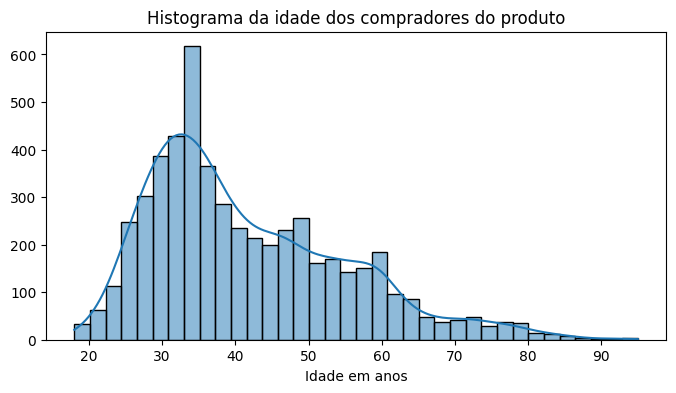

In [ ]:
# Histograma
age_of_buyers = df[df['response'] == 'yes']['age']
plt.figure(figsize=(8, 4))
sns.histplot(data=age_of_buyers, kde=True)
plt.title("Histograma da idade dos compradores do produto")
plt.xlabel("Idade em anos")
plt.ylabel("")
plt.show()

Percebe-se que grande parte dos clientes que adquiriram o produto estão na faixa dos 30 a 35 anos.

#### Análise da variável **marital**

In [ ]:
# Proporcação da variável estado civil

# Calcular as contagens normalizadas
counts = df['marital'].value_counts(normalize=True)

percentages = (counts * 100).round(1).astype(str) + '%'

# Criar um novo DataFrame combinando a coluna "marital" com as porcentagens
result_df = pd.DataFrame({'Estado Civil': counts.index, 'Porcentagem': percentages}).reset_index(drop=True)

print(result_df)

  Estado Civil Porcentagem
0      married       60.2%
1       single       28.3%
2     divorced       11.5%


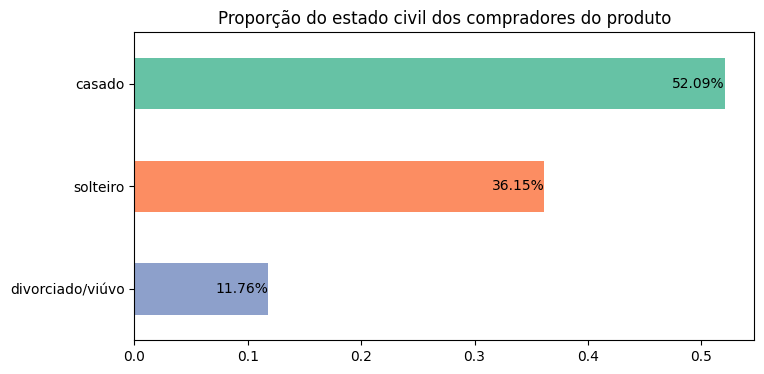

In [ ]:
# Plot
marital_of_buyers = df[df['response'] == 'yes']['marital']
marital_counts = marital_of_buyers.value_counts(normalize=True)

# Mapeia os valores do estado civil
marital_counts.index = marital_counts.index.map({
    'married': 'casado',
    'single': 'solteiro',
    'divorced': 'divorciado/viúvo'
})

colors = sns.color_palette("Set2")

plt.figure(figsize=(8, 4))
marital_counts.plot(kind="barh", color=colors)

plt.title("Proporção do estado civil dos compradores do produto")
plt.legend().set_visible(False)

# Inverte a ordem para exibir o maior valor na parte superior
plt.gca().invert_yaxis()

# Adiciona os valores de proporção dentro das barras
for index, value in enumerate(marital_counts):
    plt.text(value, index, f'{value:.2%}', va='center', color='black', ha='right')

# Define os rótulos personalizados do eixo y como os valores de estado civil
plt.yticks(range(len(marital_counts.index)), marital_counts.index)

plt.show()

No total temos que 60.2% dos clientes são casados. Analisando apenas os que adquiriram o produto essa proporção é de 52.09% de casados.

#### Análise da variável **job**

In [ ]:
# Proporção da variável de tipo de trabalho
counts = df['job'].value_counts(normalize=True)
percentages = (counts * 100).round(1).astype(str) + '%'
result_df = pd.DataFrame({'Tipo de Trabalho': counts.index, 'Porcentagem': percentages}).reset_index(drop=True)
print(result_df)

   Tipo de Trabalho Porcentagem
0       blue-collar       21.5%
1        management       20.9%
2        technician       16.8%
3            admin.       11.4%
4          services        9.2%
5           retired        5.0%
6     self-employed        3.5%
7      entrepreneur        3.3%
8        unemployed        2.9%
9         housemaid        2.7%
10          student        2.1%
11          unknown        0.6%


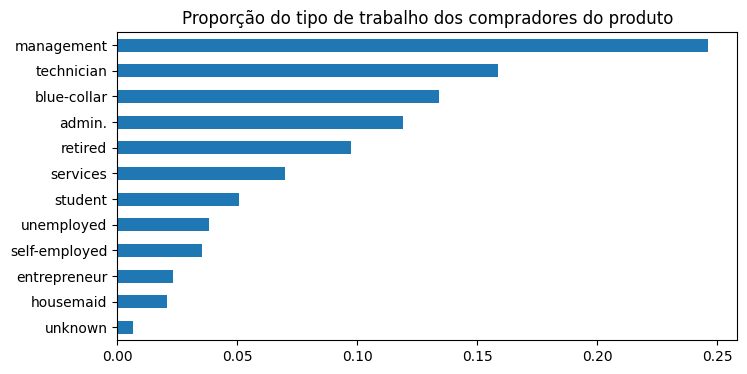

In [ ]:
# Plot
job_of_buyers = df[df['response'] == 'yes']['job']
job_counts = job_of_buyers.value_counts(normalize=True)
plt.figure(figsize=(8, 4))
job_counts.plot(kind="barh")
plt.title("Proporção do tipo de trabalho dos compradores do produto")
plt.legend().set_visible(False)
plt.gca().invert_yaxis()

plt.show()

Dentre as ocupações dos clientes, as funções 'blue-collar' se destacam como as mais comuns, representando 21,5% do total. Essas ocupações são caracterizadas por atividades físicas e manuais (como construção, montagem, manutenção, produção industrial, entre outros). No entanto, quando examinamos os clientes que adquiriram os produto, notamos uma predominância de cargos de 'management'. Essas posições envolvem liderança e gestão, com os indivíduos desempenhando papéis-chave na tomada de decisões e na coordenação das operações de suas respectivas organizações.

#### Análise da variável **education**

In [ ]:
# Proporção da variável escolaridade
counts = df['education'].value_counts(normalize=True)
percentages = (counts * 100).round(1).astype(str) + '%'
result_df = pd.DataFrame({'Escolaridade': counts.index, 'Porcentagem': percentages}).reset_index(drop=True)
print(result_df)

  Escolaridade Porcentagem
0    secondary       51.3%
1     tertiary       29.4%
2      primary       15.1%
3      unknown        4.1%


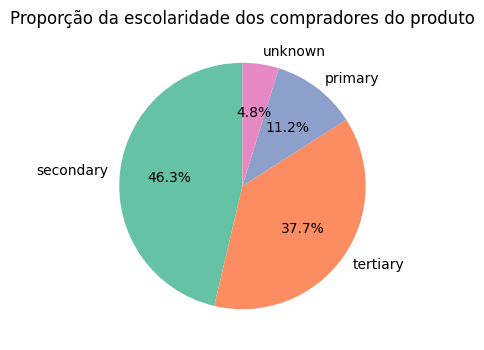

In [ ]:
# Plot
education_of_buyers = df[df['response'] == 'yes']['education']
education_counts = education_of_buyers.value_counts(normalize=True)

# Cria um gráfico de pizza com cores personalizadas
plt.figure(figsize=(8, 4))
plt.pie(education_counts, labels=education_counts.index, colors=colors, startangle=90,
        autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '')

plt.title("Proporção da escolaridade dos compradores do produto")

plt.show()

Analisando todos os clientes, bem como aqueles que adquiriram o produto, a maioria possui educação equivalente ao ensino médio, conhecido como 'secondary'. O termo 'secondary' se refere, em geral, ao nível de educação secundária, que é a etapa da educação formal que segue a educação primária e antecede o ensino superior.

#### Análise da variável **response**

In [ ]:
# Proporção da variável response
counts = df['response'].value_counts(normalize=True)
percentages = (counts * 100).round(1).astype(str) + '%'
result_df = pd.DataFrame({'Tem o produto?': counts.index, 'Porcentagem': percentages}).reset_index(drop=True)
print(result_df)

  Tem o produto? Porcentagem
0             no       88.3%
1            yes       11.7%


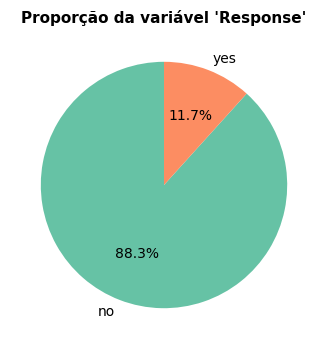

In [ ]:
# Plot
response_counts = df['response'].value_counts(normalize=True)

plt.figure(figsize=(8, 4))
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

plt.title("Proporção da variável 'Response'", fontsize=11, fontweight='bold')

plt.show()

Temos que 88.3% dos clientes não aduiriram o produto.

## Análise Multivariada

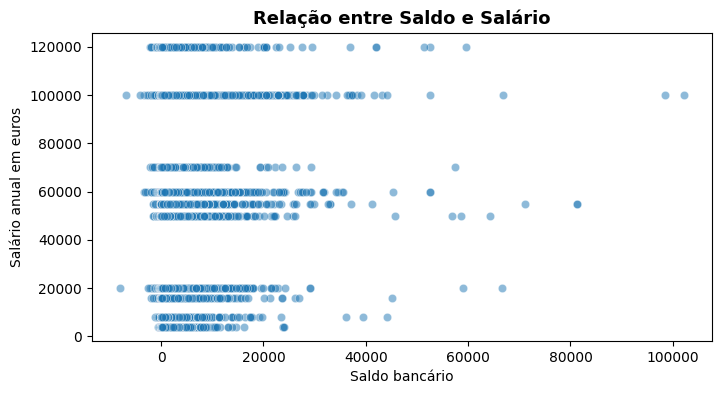

In [ ]:
# Scatter Plot Saldo x Salário

plt.figure(figsize=(8, 4))
sns.scatterplot(x="balance", y="salary", data=df, alpha=0.5)

plt.title("Relação entre Saldo e Salário", fontsize=13, fontweight="bold")

plt.xlabel("Saldo bancário")
plt.ylabel("Salário anual em euros")

plt.show()

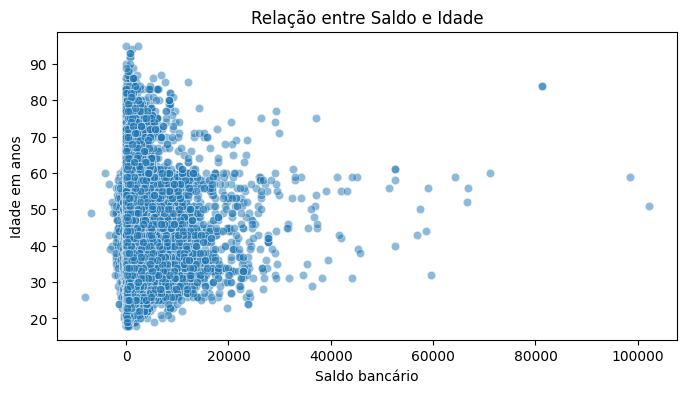

In [ ]:
# Scatter Plot Saldo x Idade
plt.figure(figsize=(8, 4))
sns.scatterplot(x="balance", y="age", data=df, alpha=0.5)

plt.title("Relação entre Saldo e Idade")

plt.xlabel("Saldo bancário")
plt.ylabel("Idade em anos")

plt.show()

Ao examinar os dados relacionando o saldo bancário com o salário, não fica evidente uma relação clara e linear. No entanto, quando observamos a relação entre o saldo bancário e a idade, notamos uma tendência. À medida que a idade aumenta, há um leve aumento no saldo bancário.

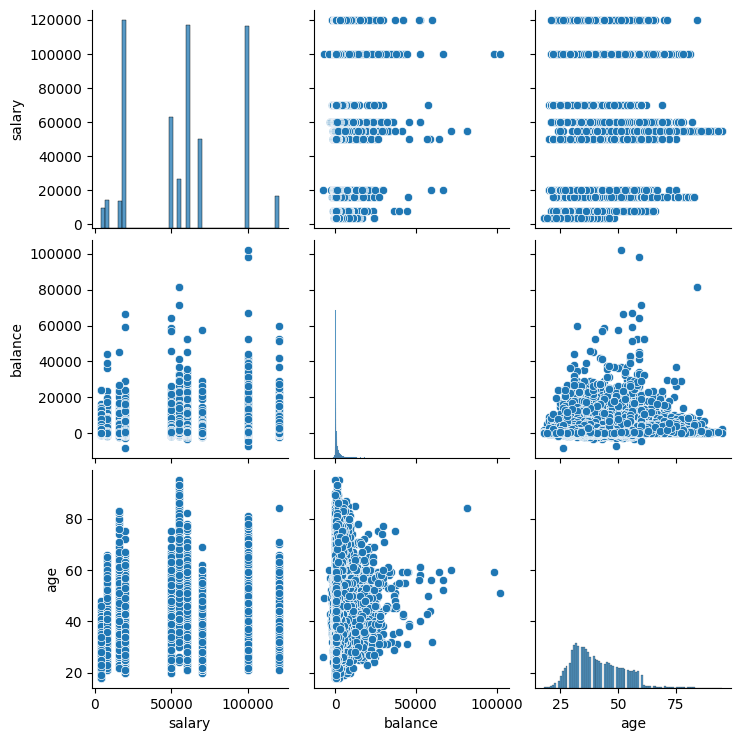

In [ ]:
# Pair Plot Salário x Saldo x Idade
sns.pairplot(df[["salary","balance","age"]])
plt.show()

In [ ]:
# Calculando a correlação Salário x Saldo x Idade
res = df[["salary", "balance", "age"]].corr()

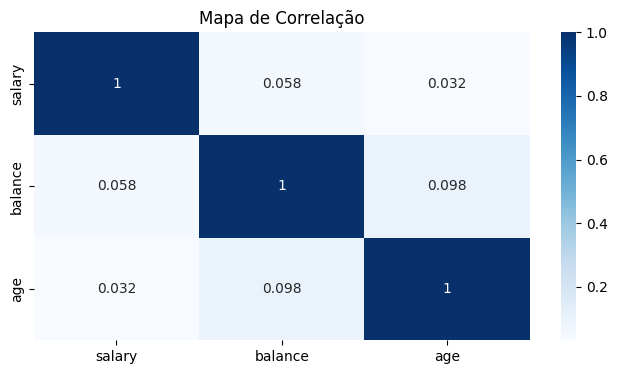

In [ ]:
# Mapa de Correlação Salário x Saldo x Idade
plt.figure(figsize = (8,4))
sns.heatmap(res, annot = True, cmap = "Blues")
plt.title("Mapa de Correlação")
plt.show()

Não há uma correlação forte entre Salário, Saldo e Idade para o nosso conjunto de dados.

In [ ]:
# Agrupando o salário pela variável resposta e calculando a média
result = df.groupby(by=["response"])["salary"].mean().reset_index()

result = result.rename(columns={"response": "Comprou o produto", "salary": "Média Salarial"})
result["Média Salarial"] = result["Média Salarial"].round(2)
print(result)

  Comprou o produto  Média Salarial
0                no        57157.69
1               yes        59157.56


In [ ]:
# Agrupando o salário pela variável resposta e calculando a mediana
result = df.groupby(by=["response"])["salary"].median().reset_index()

result = result.rename(columns={"response": "Comprou o produto", "salary": "Mediana Salarial"})
result["Mediana Salarial"] = result["Mediana Salarial"].round(2)
print(result)

  Comprou o produto  Mediana Salarial
0                no           60000.0
1               yes           60000.0


A média salarial anual dos clientes que não adquiriram o produto era de 57.157, enquanto aqueles que adquiriram tinham uma média de 59.157. Enquanto a mediana é a mesma: 60000.

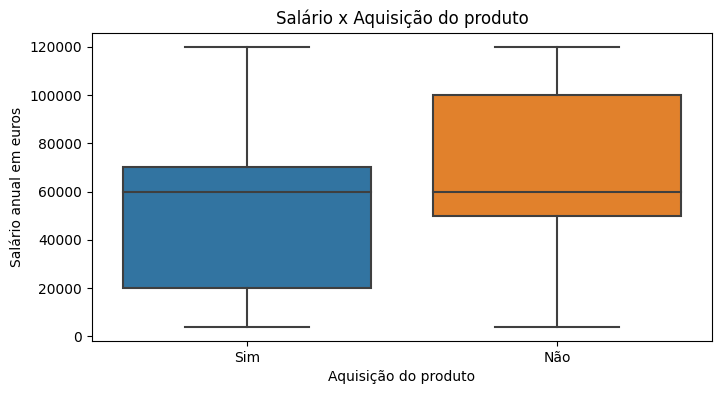

In [ ]:
# Boxplot Salário x Resposta
plt.figure(figsize=(8, 4))
ax = sns.boxplot(x="response", y="salary", data=df)

# Define rótulos personalizados no eixo x
ax.set_xticklabels(["Sim", "Não"])

plt.title("Salário x Aquisição do produto")
plt.xlabel("Aquisição do produto")
plt.ylabel("Salário anual em euros")

plt.show()


Ao analisar o boxplot, notamos que os clientes que não adquiriram o produto apresentaram salários abaixo da mediana, enquanto aqueles que o compraram tinham salários acima da mediana.

In [ ]:
# Agrupando o salário pela escolaridade e calculando a média
result = df.groupby(by=["education"])["salary"].mean().reset_index()

result = result.rename(columns={"education": "Escolaridade", "salary": "Média Salarial"})
result["Média Salarial"] = result["Média Salarial"].round(2)
print(result)

  Escolaridade  Média Salarial
0      primary        34697.11
1    secondary        49922.42
2     tertiary        83041.08
3      unknown        50708.51


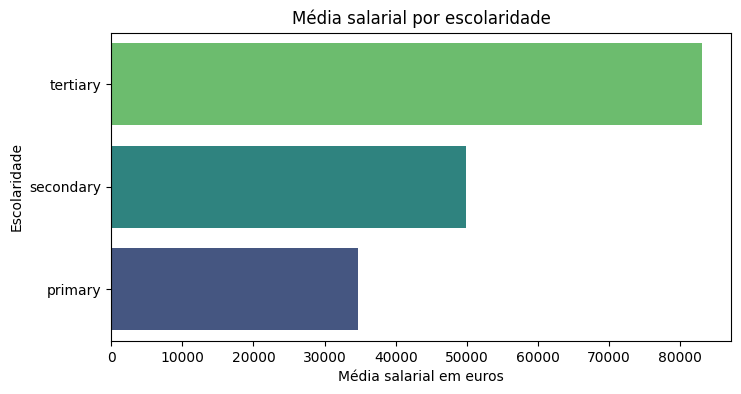

In [ ]:
# Plot
# Remove a categoria "Unknown" do DataFrame result
result = result[result['Escolaridade'] != 'unknown']

plt.figure(figsize=(8, 4))
sns.barplot(x="Média Salarial", y="Escolaridade", data=result, palette="viridis")

plt.title("Média salarial por escolaridade")
plt.xlabel("Média salarial em euros")
plt.ylabel("Escolaridade")
plt.gca().invert_yaxis()

plt.show()

Há uma tendência de aumento salarial à medida que o nível educacional aumenta.

**Mapas de correlação**

In [ ]:
# Vamos criar uma nova coluna response_flag para transformar as respostas em 0 e 1 e fazer o mapa de correlação

df["response_flag"] = np.where(df["response"] == "yes", 1, 0)

In [ ]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,education,response_flag
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,0,unknown,no,management,tertiary,0
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,0,unknown,no,technician,secondary,0
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,0,unknown,no,entrepreneur,secondary,0
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,0,unknown,no,blue-collar,unknown,0
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,0,unknown,no,unknown,unknown,0


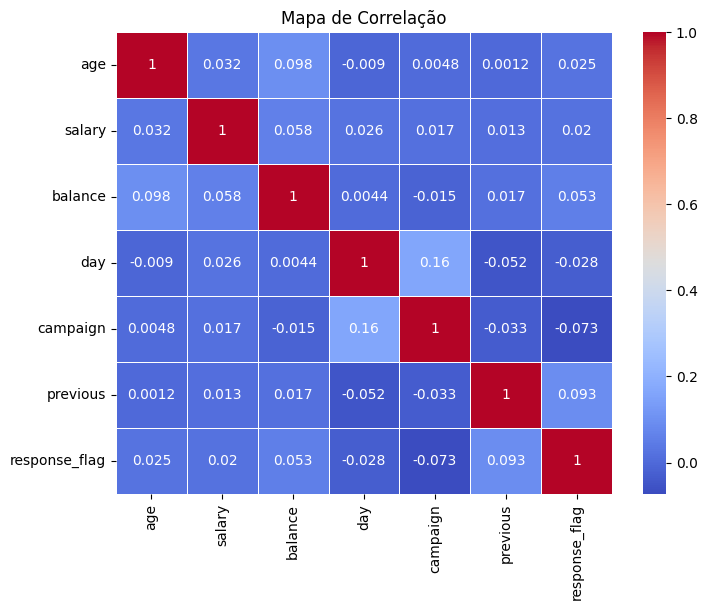

In [ ]:
# Mapa de correlação
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Mapa de Correlação")
plt.show()

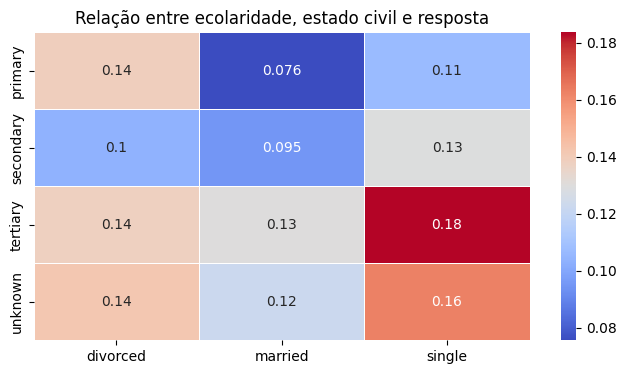

In [ ]:
# Mapa de correlação entre Ecolaridade, Estado Civil e Resposta (média)
pivot_table = df.pivot_table(index="education", columns="marital", values="response_flag", aggfunc="mean")

cmap = sns.color_palette("coolwarm", as_cmap=True)

plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, cmap=cmap, linewidths=.5)

plt.xlabel('')
plt.ylabel('')

plt.title("Relação entre ecolaridade, estado civil e resposta")
plt.show()

Esse mapa mostra como a média da variável "response_flag" varia com base na combinação de escolaridade e estado civil. As células coloridas representam essas médias, onde as cores mais quentes indicam valores mais altos e as cores mais frias indicam valores mais baixos.

Notamos padrões interessantes no mapa de correlação:

- **Clientes Solteiros com Ensino Superior (Terciary)**: Parece haver uma correlação positiva entre ser solteiro e possuir um diploma de ensino superior com uma maior probabilidade de compra do produto. Isso sugere que os clientes solteiros com ensino superior têm uma tendência mais forte de comprar o produto em comparação com outros grupos.

- **Clientes Casados com Educação Fundamental (Primary)**: Parece haver uma correlação negativa entre ser casado e possuir apenas educação fundamental com uma menor probabilidade de compra do produto. Isso indica que os clientes casados com educação fundamental têm uma probabilidade menor de comprar o produto em comparação com outros grupos.


In [ ]:
# Salvando o dataset com as alterações
novo_df = pd.DataFrame(df)

novo_df.to_excel('bank_dataset.xlsx')